In [2]:
############# Packages #############
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

In [6]:
class Hopf():
    def __init__(self, a, b, c, d, omega, maxtime, dt):
        self.a = a 
        self.b = b 
        self.c = c 
        self.d = d
        self.omega = omega 
        self.maxtime = maxtime 
        self.dt = dt 
    
    def hopf(self, t, z, mu):
        x = z 
        dynamics = np.empty_like(x)
        dynamics[0] = self.d*mu*x[0] + self.a*x[0]**3
        dynamics[1] = self.omega + self.c*mu + self.b*x[0]**2
        return dynamics 
    
    def rk_solver(self, x_init, mu):
        sol = solve_ivp(fun=self.hopf, t_span=[0, self.maxtime], y0=x_init, args=(mu,), method='RK45', dense_output=True, rtol=1e-6, atol=1e-10)
        t = np.linspace(0, self.maxtime, int(self.maxtime/self.dt)+1)
        z = sol.sol(t)
        return z 

In [7]:
a = -1
b = 0
c = 0
d = 1
omega = 1
maxtime = 10; dt = 0.01

hopf = Hopf(a=a, b=b, c=c, d=d, omega=omega, maxtime=maxtime, dt=dt)

In [24]:
mu_lst = [-1.0, 0.0, 1.0]
x_init_lst = [np.array([2.0, 1.0]), np.array([0.5, -2.0])]
sol_list = []
for i in range(len(mu_lst)):
    eachmulst = []
    for j in range(len(x_init_lst)):
        sol_z = hopf.rk_solver(x_init=x_init_lst[j], mu=mu_lst[i])
        eachmulst.append(sol_z)
    sol_list.append(eachmulst)


In [17]:
def polar_change(r, theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x, y


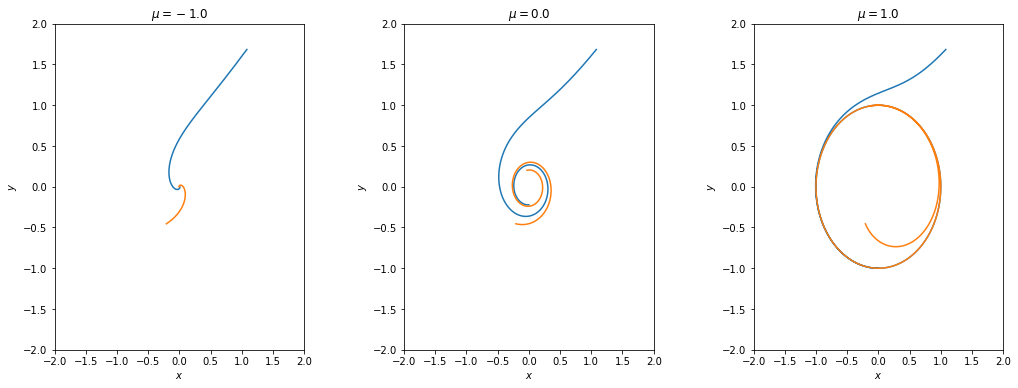

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(17,6))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(len(sol_list)):
    for j in range(len(sol_list[i])):
        r = sol_list[i][j][0]; theta = sol_list[i][j][1]
        x, y = polar_change(r, theta)
        axes[i].plot(x, y)
    axes[i].set_xlim([-2, 2]); axes[i].set_ylim([-2, 2])
    axes[i].set_xlabel(r"$x$"); axes[i].set_ylabel(r"$y$")
    axes[i].set_title(r"$\mu = {}$".format(mu_lst[i]))
plt.savefig("./6.6_hopf_trajectory.svg")
